# Purpose: To calrep a file and produce a comparision plot subtracting a results file or mean 

## Steps to complete

1. Open a raw file
2. create a mean frame from history
3. calrep raw file
4. subtract mean frame and calrep file
5. plot a shaded region for the error values and the difference

In [1]:
from pyMeasure import *
from pyMeasure.Code.Analysis.Uncertainty import *
import os
import pandas

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
The module smithplot was not found,please put it on the python path
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
The module smithplot was not found,please put it on the python path
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.Analysis.Uncertainty
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
options={"data_begin_line":0,"data_end_line":-1,"data_delimiter":"[\s]+","column_names_delimiter":None}
res=ResultFileModel(r"V:\checkstd\resfiles\CTN208",**options)

In [3]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


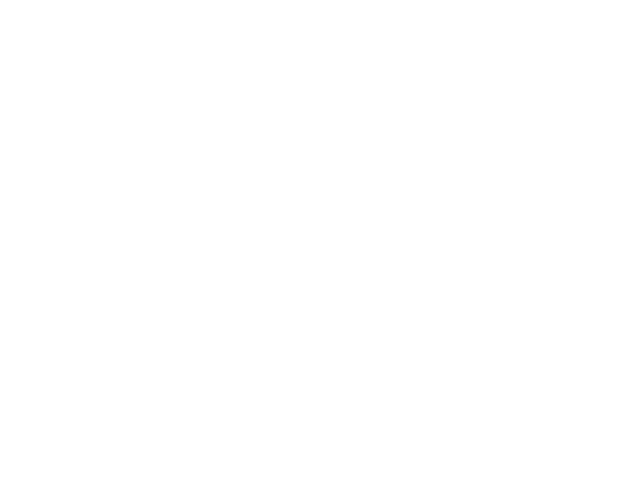

In [4]:
%matplotlib notebook
plt.plot(res["Frequency"],res["magS11"])

In [5]:
# redefined this way so I can run it other machines
SHARE_DIRECTORY=r"C:\Share"
RESULTS_ONE_PORT=os.path.join(SHARE_DIRECTORY,r"Combined_Results_Files\One_Port_Combined_Results_File.csv")
RESULTS_TWO_PORT=os.path.join(SHARE_DIRECTORY,r"Combined_Results_Files\Two_Port_Combined_Results_File.csv")
RESULTS_POWER=os.path.join(SHARE_DIRECTORY,r"Combined_Results_Files\Power_Combined_Results_File.csv")
TWO_PORT_NR_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Two_Port_NR_Check_Standard.csv")
COMBINED_ONE_PORT_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Combined_One_Port_Check_Standard.csv")
COMBINED_TWO_PORT_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Combined_Two_Port_Check_Standard.csv")
COMBINED_POWER_CHKSTD_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_Check_Standard\Combined_Power_Check_Standard.csv")
ONE_PORT_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\One_Port_DUT.csv")
TWO_PORT_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\Two_Port_DUT.csv")
POWER_3TERM_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\Power_3Term_DUT.csv")
POWER_4TERM_CALREP_CSV=os.path.join(SHARE_DIRECTORY,r"Converted_DUT\Power_4Term_DUT.csv")
one_port_dtype={'Frequency':'float',
 'Direction':'str',
 'Connect':'str',
 'System_Id':'str',
 'System_Letter':'str',
 'Connector_Type_Calibration':'str',
 'Connector_Type_Measurement':'str',
 'Measurement_Type':'str',
 'Measurement_Date':'str',
 'Measurement_Time':'str',
 'Program_Used':'str',
 'Program_Revision':'str',
 'Operator':'str',
 'Calibration_Name':'str',
 'Calibration_Date':'str',
 'Port_Used':'int',
 'Number_Connects':'str',
 'Number_Repeats':'str',
 'Nbs':'str',
 'Number_Frequencies':'str',
 'Start_Frequency':'float',
 'Device_Description':'str',
 'Device_Id':'str',
 'Measurement_Timestamp':'str',
}
if COMBINE_S11_S22:
    one_port_dtype["arg"]='float'
    one_port_dtype["mag"]='float'
else:
    one_port_dtype["argS11"]='float'
    one_port_dtype["magS11"]='float'
    one_port_dtype["argS22"]='float'
    one_port_dtype["magS22"]='float'

# The big time and memory sink, there has to be a better way to do this
history_dict={'1-port':pandas.read_csv(COMBINED_ONE_PORT_CHKSTD_CSV,dtype=one_port_dtype),
         '2-port':pandas.read_csv(COMBINED_TWO_PORT_CHKSTD_CSV),
         '2-portNR':pandas.read_csv(TWO_PORT_NR_CHKSTD_CSV),
         'power':pandas.read_csv(COMBINED_POWER_CHKSTD_CSV),
         '1-port calrep':pandas.read_csv(ONE_PORT_CALREP_CSV),
         '2-port calrep':pandas.read_csv(TWO_PORT_CALREP_CSV),
         'power 3term calrep':pandas.read_csv(POWER_3TERM_CALREP_CSV),
         'power 4term calrep':pandas.read_csv(POWER_4TERM_CALREP_CSV),
         '1-port results':pandas.read_csv(RESULTS_ONE_PORT),
         '2-port results':pandas.read_csv(RESULTS_TWO_PORT),
         'power results':pandas.read_csv(RESULTS_POWER)}

def return_history_key(input_model):
    "Returns a key for the history dictionary given a calrep model"
    model=input_model.__class__.__name__
    print("{0} is {1}".format("model",model))
    if re.search('Calrep|DUT',model):
        if re.search('OnePortCalrep',model):
            return '1-port calrep'
        elif re.search('TwoPortCalrep',model):
            return '2-port calrep'
        elif re.search('PowerCalrep',model):
            if calrep_model.options["column_names"]==POWER_3TERM_COLUMN_NAMES:
                return 'power 3term calrep'
            elif calrep_model.options["column_names"]==POWER_4TERM_COLUMN_NAMES:
                return 'power 4term calrep'
        elif re.search('OnePortDUT',model):
            return 'power 3term calrep'
        
    elif re.search('Raw',model):
        if re.search('OnePortRaw',model):
            return '1-port'
        elif re.search('TwoPortRaw',model):
            return '2-port'
        elif re.search('TwoPortNRRaw',model):
            return '2-portNR'
        elif re.search('PowerRaw',model):
            return 'power'
        
    else:
        raise TypeError("Must be a calrep model, such as OnePortCalrepModel, etc. ")

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,16,18,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,9,14,16,17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
input_file=os.path.join(SHARE_DIRECTORY,"Ck_Std_raw_ascii\CTN102.R13_010609")
input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN114.R33_102810")
input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN208.L26_121399")
input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN208.L26_121399")

#broken Thinks Frequency is a string for one_port_combined, results file works...
#input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN102.K2_053012")

#broken Thinks Frequency is a string
#input_file=os.path.join(SHARE_DIRECTORY,r"Ck_Std_raw_ascii\CTN112.L1_020514")

# Need to fix 2.4mm connector
#input_file=r"C:\Share\Ck_Std_raw_ascii\C24202.L22_052411"

file_model=sparameter_power_type(input_file)
model=globals()[file_model]
table=model(input_file)
# for some reason the measurement_connector_type is wrong .. fix it
table.metadata["Connector_Type_Measurement"]="Type N"
calrep_table=calrep(table)

In [7]:
print("The {0} of table is {1}".format("history_key",return_history_key(table)))

model is TwoPortRawModel
The history_key of table is 2-port


In [8]:
return_history_key(table)

model is TwoPortRawModel


'2-port'

In [10]:


    
def frequency_model_difference(model_1,model_2,**options):
    """Takes the difference of two models that both have frequency and a similar set of columns. Returns an object that is 
    a list of [[frequency,column_1,..column_n],...] where columns are the same in the models. If  a particular subset of 
    columns is desired use columns=["Frequency","magS11] models can be any subclass of AsciiDataTable, SNP, or 
    pandas.DataFrame, if a column is a non-numeric type it drops it. The frequency list should be unique 
    (no multiple frequencies) for at least one model"""
    # Set up defaults and pass options
    defaults={"columns":"all","interpolate":False,"average":True}
    difference_options={}
    for key,value in defaults.iteritems():
        difference_options[key]=value
    for key,value in options.iteritems():
        difference_options[key]=value
        
    # first check type, if it is a panadas data frame a little conversion is needed, else is for all other models
    if type(model_1) in [pandas.DataFrame]:
        model_1=DataFrame_to_AsciiDataTable(model_1)
    if type(model_2) in [pandas.DataFrame]:
        model_2=DataFrame_to_AsciiDataTable(model_2)
    # now start with a set of frequencies (unique values from both)
    frequency_set_1=set(model_1["Frequency"])
    frequency_set_2=set(model_2["Frequency"])
    model_2_frequency_selector=model_2.column_names.index('Frequency')
    column_names_set_1=set(model_1.column_names)
    column_names_set_2=set(model_2.column_names)
    

    # All points must be in the intersection to be used
    frequency_intersection=list(frequency_set_1.intersection(frequency_set_2))
    column_names_intersection=list(column_names_set_1.intersection(column_names_set_2))
    
    if not frequency_intersection:
        print("The models do not have any frequency points in common")
        return None
    
    difference_data=[]
    for row_index,frequency in enumerate(model_1["Frequency"]):
        new_row=[frequency]
        new_column_names=["Frequency"]
        if frequency in frequency_intersection:
            model_2_frequency_row=filter(lambda x: x[model_2_frequency_selector]==frequency,model_2.data)[0]
            #print("{0} is {1}".format("model_2_frequency_row",model_2_frequency_row))
            for column_index,column in enumerate(model_1.column_names):
                if column in column_names_intersection and column not in ["Frequency"]:
                    model_2_column_selector=model_2.column_names.index(column)
                    if re.search('int|float',
                                 model_1.options["column_types"][column_index],
                                 re.IGNORECASE) and re.search('int|float',
                                                              model_2.options["column_types"][model_2_column_selector],
                                                              re.IGNORECASE):
                        
                        new_row.append(model_1.data[row_index][column_index]-model_2_frequency_row[model_2_column_selector])
                        new_column_names.append(column)
                    elif difference_options["columns"] in ["all"]:
                        new_row.append(model_1.data[row_index][column_index])
                        new_column_names.append(column)
            difference_data.append(new_row)
    difference_options["column_names"]=new_column_names
    difference_options["data"]=difference_data      
    result=AsciiDataTable(None,**difference_options)
    return result
    

In [11]:
table.metadata

{'Calibration_Date': '',
 'Calibration_Name': '',
 'Connector_Type_Calibration': '',
 'Connector_Type_Measurement': 'Type N',
 'Device_Description': 'type n 20db atten',
 'Device_Id': 'CTN208',
 'Measurement_Date': '13 Dec 1999',
 'Measurement_Time': '09:01:15',
 'Measurement_Type': '2-port',
 'Nbs': '4',
 'Number_Connects': '3',
 'Number_Frequencies': '181',
 'Number_Repeats': '1',
 'Operator': 'dl',
 'Port_Used': '1',
 'Program_Revision': '981016.1',
 'Program_Used': '8536D',
 'Start_Frequency': '7',
 'System_Id': 'HP8510',
 'System_Letter': 'L'}

<IPython.core.display.Javascript object>


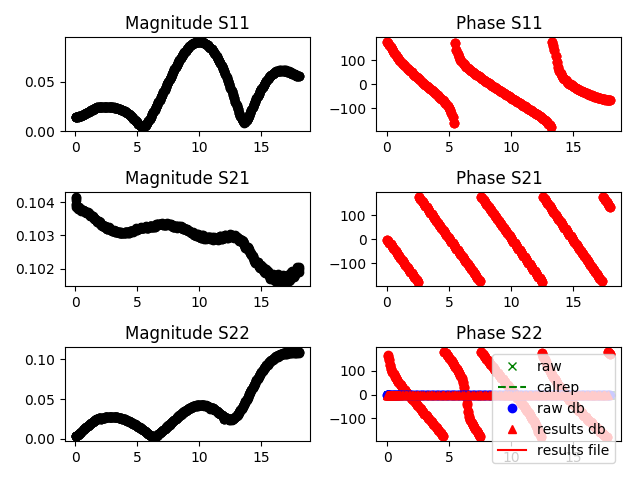

In [12]:
fig=table.show()

In [13]:
if table.metadata["Device_Id"]=='00080':
    table.metadata["Device_Id"]='80'
elif table.metadata["Device_Id"]=='02681':
    table.metadata["Device_Id"]='2681'
options={"Device_Id":table.metadata["Device_Id"], "System_Id":table.metadata["System_Id"],"Measurement_Timestamp":None,
                                      "Connector_Type_Measurement":None,
                                     "Measurement_Date":None,"Measurement_Time":None}
if re.search('2-port',table.metadata["Measurement_Type"],re.IGNORECASE) and not re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-port'
    options["column_names"]=['Frequency','magS11','argS11','magS21','argS21','magS22','argS22']
elif re.search('2-portNR',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='2-portNR'
    options["column_names"]=['Frequency','magS11','argS11','magS12','argS12','magS21','argS21','magS22','argS22']
elif re.search('1-port',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='1-port'
    if COMBINE_S11_S22:
        options["column_names"]=['Frequency','magS11','argS11']
    else:
        options["column_names"]=['Frequency','magS11','argS11','magS22','argS22']
elif re.search('Dry Cal|Thermistor|power',table.metadata["Measurement_Type"],re.IGNORECASE):
    history_key='power'
    options["column_names"]=['Frequency','magS11','argS11','Efficiency']
                    #print history[history_key][:5]
print history_key
# Here is the magic, given an extra column, we can filter on that column. We need one that is "good", "bad", "other"
mean_1=mean_from_history(history_dict[history_key].copy(),**options)
options["System_Id"]=None
mean_2=mean_from_history(history_dict[history_key + " results"].copy(),**options)
device_history=history_dict[history_key].copy()
device_history=device_history[device_history["Device_Id"]==table.metadata["Device_Id"]]
unique_dates=device_history["Measurement_Date"].unique().tolist()

2-port


In [14]:

test_columns_names=["magS11"]
uncertainty_test_column_names=['uMgS11']


In [16]:
# now we need to plot a representive curve from each
plt.plot(table["Frequency"],table["magS11"],'gx',label="raw")
plt.plot(calrep_table["Frequency"],calrep_table["magS11"],'g--',label="calrep")
plt.plot(mean_1["Frequency"],mean_1["magS11"],'bo',label="raw db")
plt.plot(mean_2["Frequency"],mean_2["magS11"],'r^',label="results db")
plt.plot(res["Frequency"],res["magS11"],'r-',label="results file")
plt.legend(loc=0)

<IPython.core.display.Javascript object>


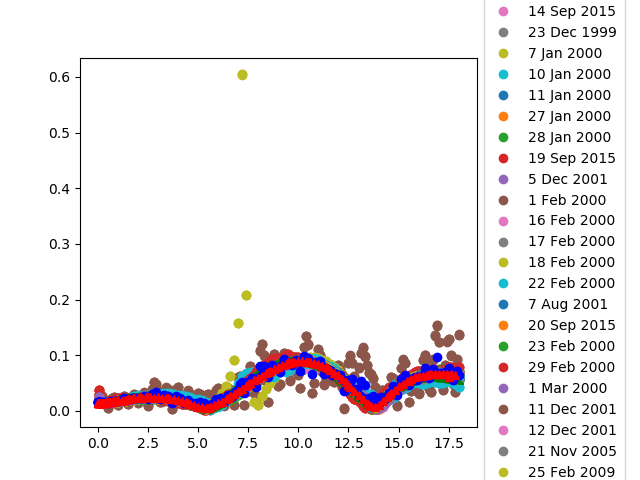

In [19]:
%matplotlib notebook
PARAMETER="magS11"
ERROR=PARAMETER.replace("mag","uMg").replace("arg","uAg")
offset=60
max_curves=50
number_lines=len(unique_dates)-1
fig, (ax0) = plt.subplots(nrows=1, sharex=True)
for date_index,date in enumerate(unique_dates[offset:offset+max_curves]):
    # this data frame is the thing that needs to be filtered 
    # do we need to calrep this data frame and then check it against another standard file?
    # so we need a seed (one file that is marked as good)
    data_frame=device_history[device_history["Measurement_Date"]==date]
    
    date_color=(1-float(date_index+1)/number_lines,0,float(date_index+1)/number_lines,.5)
    ax0.plot(data_frame["Frequency"],data_frame[PARAMETER],'o',label=date)
ax0.plot(table["Frequency"],table[PARAMETER],'gx',label="raw")
ax0.plot(calrep_table["Frequency"],calrep_table[PARAMETER],'g--',label="calrep")
ax0.plot(mean_1["Frequency"],mean_1[PARAMETER],'bo',label="raw db")
ax0.plot(mean_2["Frequency"],mean_2[PARAMETER],'r^',label="results db")
ax0.plot(res["Frequency"],res[PARAMETER],'r-',label="results file")
box = ax0.get_position()
ax0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5))



<IPython.core.display.Javascript object>


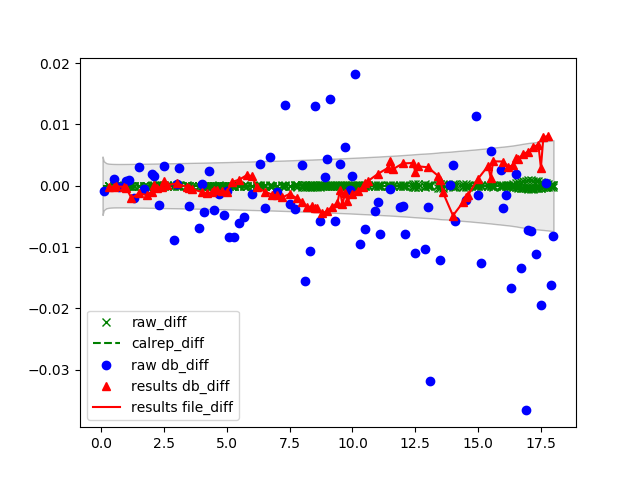

In [20]:
# now take the difference of each and plot it with a shaded region defined by the calrep errors
table_diff=frequency_model_difference(table,calrep_table)
calrep_table_diff=frequency_model_difference(calrep_table,calrep_table)
mean_1_diff=frequency_model_difference(calrep_table,mean_1)
mean_2_diff=frequency_model_difference(mean_2,calrep_table)
res_diff=frequency_model_difference(res,calrep_table)
plt.plot(table_diff["Frequency"],table_diff["magS11"],'gx',label="raw_diff")
plt.plot(calrep_table_diff["Frequency"],calrep_table_diff["magS11"],'g--',label="calrep_diff")
plt.plot(mean_1_diff["Frequency"],mean_1_diff["magS11"],'bo',label="raw db_diff")
plt.plot(mean_2_diff["Frequency"],mean_2_diff["magS11"],'r^',label="results db_diff")
plt.plot(res_diff["Frequency"],res_diff["magS11"],'r-',label="results file_diff")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS11"]),
                 calrep_table["uMgS11"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend(loc=3)

<IPython.core.display.Javascript object>


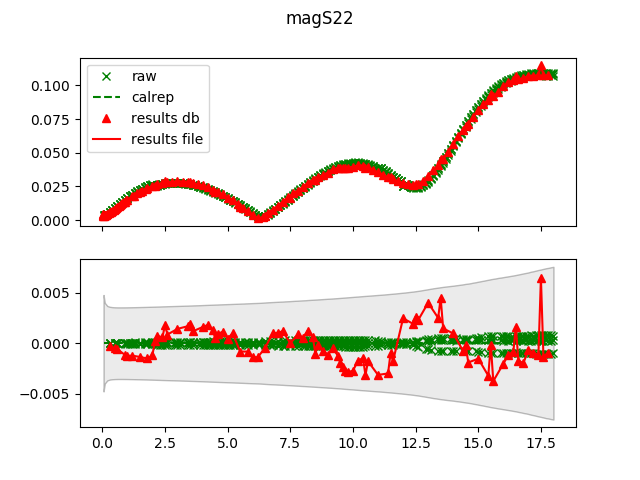

In [21]:
# now we can do both for S21 AND s22
# now we need to plot a representive curve from each
PARAMETER="magS22"
ERROR=PARAMETER.replace("mag","uMg").replace("arg","uAg")
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.plot(table["Frequency"],table[PARAMETER],'gx',label="raw")
ax0.plot(calrep_table["Frequency"],calrep_table[PARAMETER],'g--',label="calrep")
#ax0.plot(mean_1["Frequency"],mean_1[PARAMETER],'bo',label="raw db")
ax0.plot(mean_2["Frequency"],mean_2[PARAMETER],'r^',label="results db")
ax0.plot(res["Frequency"],res[PARAMETER],'r-',label="results file")
ax0.legend(loc=0)
ax1.plot(table_diff["Frequency"],table_diff[PARAMETER],'gx',label="raw_diff")
ax1.plot(calrep_table_diff["Frequency"],calrep_table_diff[PARAMETER],'g--',label="calrep_diff")
#ax1.plot(mean_1_diff["Frequency"],mean_1_diff[PARAMETER],'bo',label="raw db_diff")
ax1.plot(mean_2_diff["Frequency"],mean_2_diff[PARAMETER],'r^',label="results db_diff")
ax1.plot(res_diff["Frequency"],res_diff[PARAMETER],'r-',label="results file_diff")
ax1.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table[ERROR]),
                 calrep_table[ERROR],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.suptitle(PARAMETER)
#ax1.legend(loc=3)

In [ ]:
def mean_from_history_outlier_rejected(history_frame,**options):
    """mean_from_history creates a mean_frame given a full history frame (pandas.DataFrame object),
    by setting options it selects column names
    to output and input values to filter on. Returns a pandas.DataFrame object with column names = column_names,
    and filtered by any of the following: "Device_Id","System_Id","Measurement_Timestamp",
    "Connector_Type_Measurement", "Measurement_Date" or "Measurement_Time"
    we need to excluded raw data sets that don't conform to selection criteria. We need a standard curve with uncertainty"""

    defaults={"Device_Id":None, "System_Id":None,"Measurement_Timestamp":None,
              "Connector_Type_Measurement":None,
             "Measurement_Date":None,"Measurement_Time":None,
              "column_names":['Frequency','magS11','argS11']}
    mean_options={}
    for key,value in defaults.iteritems():
        mean_options[key]=value
    for key,value in options.iteritems():
            mean_options[key]=value

    filters=["Device_Id","System_Id","Measurement_Timestamp","Connector_Type_Measurement",
             "Measurement_Date","Measurement_Time"]
    temp_frame=history_frame.copy()
    for index,filter_type in enumerate(filters):
        if mean_options[filter_type] is not None:
            temp_frame=temp_frame[temp_frame[filter_type]==mean_options[filter_type]]
#     temp_frame=temp_frame[temp_frame["Device_Id"]==mean_options["Device_Id"]]
#     temp_frame=temp_frame[temp_frame["System_Id"]==mean_options["System_Id"]]
    unique_frequency_list=temp_frame["Frequency"].unique()
    mean_array=[]
    for index,freq in enumerate(unique_frequency_list):
        row=[]
        for column in mean_options["column_names"]:
            values=np.mean(temp_frame[temp_frame["Frequency"]==unique_frequency_list[index]][column].as_matrix())
            mean_value=np.mean(values)
            row.append(mean_value)
        mean_array.append(row)
    mean_frame=pandas.DataFrame(mean_array,columns=mean_options["column_names"])
    return mean_frame

In [ ]:
diff_adt=frequency_model_difference(res,calrep_table)

In [ ]:
#calrep_table.column_names
res.column_names

In [ ]:
def standard_error_data_table(table_1,table_2,**options):
    """standard error data table takes two tables and creates a table that is the standard error of the two tables,
    at least one table must have uncertainties associated with it. The input tables are assumed to have data
    in the form [[x, y1, y2,...]..] Uncertatinties can be specified as a column name in the respective
    table, fractional, constant, or a function of the values. The returned table is an object
    of the class StandardErrorModel(AsciiDataTable) that has data in the form
    [[independent_varaible,SEValue1,SEValue2...]...] where column names are formed by
    appending SE to the value column names. To plot the table use result.show()
    """
    defaults={}
    error_options={"independent_variable_column_name":"Frequency",
                  "value_column_names":['magS11','argS11','magS21',
                                                'argS21','magS22','argS22'],
                  "table_1_uncertainty_column_names":['uMgS11','uAgS11',
                                                      'uMgS21','uAgS21','uMgS22','uAgS22'],
                  "table_2_uncertainty_column_names":['uMgS11','uAgS11',
                                                      'uMgS21','uAgS21','uMgS22','uAgS22'],
                   "uncertainty_table_1":None,
                   "uncertainty_table_2":None,
                   "uncertainty_function_table_1":None,
                   "uncertainty_function_table_2":None,
                   "uncertainty_function":None,
                   "uncertainty_type":None,
                   "table_1_uncertainty_type":"table",
                   "table_2_uncertainty_type":None,
                   "expansion_factor":1,
                   'debug':False}

    for key,value in defaults.iteritems():
        error_options[key]=value
    for key,value in options.iteritems():
        error_options[key]=value
    # Begin by checking at least one table has an error associated with it
    if error_options["table_1_uncertainty_type"] is None and error_options["table_2_uncertainty_type"] is None:
        raise StandardErrorError("Undefined Error For Both Tables: Define at least one of "
                                 "table_1_uncertainty_type or table_2_uncertainty_type to be a value other than None")
    if error_options["expansion_factor"]:
        expansion_factor=float(error_options["expansion_factor"])
    else:
        expansion_factor=1
    # first find a unique list of the independent variable for both curves
    if error_options["debug"]:
        begin_time=datetime.datetime.utcnow()
        print("started finding intersection of"
              "table_1[{0}] and table_2[{1}] at {2}".format(error_options["independent_variable_column_name"],
                                                           error_options["independent_variable_column_name"],
                                                           begin_time))
    x_set_table_1=set(table_1[error_options["independent_variable_column_name"]])
    x_set_table_2=set(table_2[error_options["independent_variable_column_name"]])
    unique_x=sorted(list(x_set_table_1.intersection(x_set_table_2)))
    if error_options["debug"]:
        end_time=datetime.datetime.utcnow()
        print("finished finding intersection at {0}".format(end_time))
        delta_time=end_time-begin_time
        print("it took {0} to find the intersection that contained {1} points".format(delta_time,len(unique_x)))
    if not unique_x:
        raise StandardErrorError("No points in the intersection, please either interpolate one data set or compare"
                                 "with another data set")

    # next build the new data set
    out_data=[]
    x_column_index_table_1=table_1.column_names.index(error_options["independent_variable_column_name"])
    x_column_index_table_2=table_2.column_names.index(error_options["independent_variable_column_name"])
    # we choose the row by using unique_x
    for x_value in unique_x:
        # here if there are multiple values for x_value we ignore them
        table_1_row=filter(lambda x: x[x_column_index_table_1]==x_value,table_1.data)[0]
        # we begin a new_row
        table_2_rows=filter(lambda x: x[x_column_index_table_2]==x_value,table_2.data)
        if error_options["debug"]:
            print("{0} is {1}".format("table_2_rows",table_2_rows))
        for table_2_row in table_2_rows:
            new_row=[x_value]
            for column_index,column_name in enumerate(error_options["value_column_names"]):
                value_1_column_selector=table_1.column_names.index(column_name)
                value_2_column_selector=table_2.column_names.index(column_name)
                value_1=table_1_row[value_1_column_selector]
                value_2=table_2_row[value_2_column_selector]
                # now we assign the error to value 1
                if error_options["table_1_uncertainty_type"] is None:
                    error_1=0
                elif re.search("table|list",error_options["table_1_uncertainty_type"],re.IGNORECASE):
                    error_1_column_selector=table_1.column_names.index(error_options["table_1_uncertainty_column_names"][column_index])
                    error_1=table_1_row[error_1_column_selector]
                elif re.search("con|fixed",error_options["table_1_uncertainty_type"],re.IGNORECASE):
                    error_1=float(error_options["uncertainty_table_1"])
                elif re.search("fract",error_options["table_1_uncertainty_type"],re.IGNORECASE):
                    error_1=float(error_options["uncertainty_table_1"])*value_1
                elif re.search("func",error_options["table_1_uncertainty_type"],re.IGNORECASE):
                    error_1=error_options["uncertainty_table_1_function"](value_1)
                else:
                    error_1=0
                # now the same for table 2
                if error_options["table_2_uncertainty_type"] is None:
                    error_2=0
                elif re.search("table|list",error_options["table_2_uncertainty_type"],re.IGNORECASE):
                    error_2_column_selector=table_2.column_names.index(error_options["table_2_uncertainty_column_names"][column_index])
                    error_2=table_2_row[error_2_column_selector]
                elif re.search("con|fixed",error_options["table_2_uncertainty_type"],re.IGNORECASE):
                    error_2=float(error_options["uncertainty_table_2"])
                elif re.search("fract",error_options["table_2_uncertainty_type"],re.IGNORECASE):
                    error_2=float(error_options["uncertainty_table_2"])*value_2
                elif re.search("func",error_options["table_2_uncertainty_type"],re.IGNORECASE):
                    error_2=error_options["uncertainty_table_2_function"](value_2)
                else:
                    error_2=0
                # now calculate the value and append

                standard_error=(value_1-value_2)/(expansion_factor*math.sqrt(error_1**2+error_2**2))
                new_row.append(standard_error)
            out_data.append(new_row)
        # now we handle the standard error table creation
    standard_error_column_names=[error_options["independent_variable_column_name"]]
    for column_name in error_options["value_column_names"]:
        standard_error_column_names.append("SE"+column_name)
    error_options["column_names"]=standard_error_column_names[:]
    if error_options["debug"]:
        print("{0} is {1}".format("standard_error_column_names",standard_error_column_names))
        print("{0} is {1}".format("out_data",out_data))
    error_options["column_types"]=['float' for column in  standard_error_column_names[:]]
    error_options["data"]=out_data[:]
    out_table=StandardErrorModel(None,**error_options)
    return out_table

In [ ]:
standard_error=standard_error_data_table(calrep_table,res,expansion_factor=2)

In [ ]:
for key,value in standard_error.get_conformation_dictionary().iteritems():
    if value:
        statement="conforms"
    else:
        statement="does not conform"
    print("The standard error colum {0} {1}".format(key,statement) )
fig=standard_error.show()


In [ ]:
standard_error.get_conformation_dictionary()

In [ ]:
print diff_adt

In [ ]:
# now try to calculate the mean from the combined results
mean_1=mean_from_history(history_dict[return_history_key(table)],column_names=table.column_names)

In [ ]:
options={"Device_Id":table.metadata["Device_Id"],"System_Id":table.metadata["System_Id"]}
mean_frame=mean_from_history(history_dict[return_history_key(table)],column_names=table.column_names)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib notebook
plt.plot(mean_frame["Frequency"],mean_frame["magS11"])

In [ ]:
plt.plot(mean_frame_2["Frequency"],mean_frame_2["magS11"])

In [ ]:
one_port_history=history_dict[return_history_key(table)]

In [ ]:
options={"Device_Id":table.metadata["Device_Id"]}
mean_frame_2=mean_from_history(history_dict["1-port results"],
                               column_names=["Frequency","magS11","argS11"])

In [ ]:
#mean_frame
plt.plot(mean_frame_2["Frequency"],mean_frame_2["magS11"])

In [ ]:
history_dict["2-port results"].columns

In [ ]:
out=one_port_history.rename(columns = {'mag':'magS11','arg':'argS11'})
out.to_csv(r"C:\Share\Converted_Check_Standard\Combined_One_Port_Check_Standard.csv",index=False)

In [ ]:
out.columns

In [ ]:
#diff=frequency_model_difference(table,mean_frame)
diff_2=frequency_model_difference(table,mean_frame_2)
diff_2.column_names=["Frequency","magS11","argS11"]

In [ ]:

#plt.plot(diff["Frequency"],diff["magS11"],"rx",label="Difference Calculated Mean")
plt.plot(diff_2["Frequency"],diff_2["magS11"],"b--",label="Difference Results File")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS11"]),calrep_table["uMgS11"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend()

In [ ]:
print diff_2

In [ ]:
plt.plot(diff["Frequency"],diff["magS22"],"rx",label="Difference Calculated Mean")
plt.plot(diff_2["Frequency"],diff_2["magS22"],"b--",label="Difference Results File")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS22"]),calrep_table["uMgS22"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend()

In [ ]:
plt.plot(diff["Frequency"],diff["magS21"],"rx",label="Difference Calculated Mean")
plt.plot(diff_2["Frequency"],diff_2["magS21"],"b--",label="Difference Results File")
plt.fill_between(calrep_table["Frequency"],-1*np.array(calrep_table["uMgS21"]),calrep_table["uMgS21"],edgecolor=(0,.0,.0,.25), facecolor=(.25,.25,.25,.1),
                            linewidth=1)
plt.legend()

In [ ]:
table.show()

In [ ]:
plt.plot(mean_frame["Frequency"],mean_frame["magS11"],"rx",label="Mean from DB")
plt.plot(mean_frame_2["Frequency"],mean_frame_2["magS11"],"b--",label="Mean from Results File")
plt.legend()

In [ ]:
mean_frame_2

In [ ]:
mean_1.columns.tolist()

In [ ]:
adt=DataFrame_to_AsciiDataTable(mean_1)

In [ ]:
adt.column_names==mean_1.columns.tolist()

In [ ]:
diff_adt=frequency_model_difference(calrep_table,adt)
diff_adt_2=frequency_model_difference(adt,calrep_table)

In [ ]:
diff_adt.column_names

In [ ]:
diff_adt=frequency_model_difference(adt,calrep_table)

In [ ]:
adt.column_names

In [ ]:
calrep_table.column_names

In [ ]:
adt.column_names[0]==calrep_table.column_names[0]

In [ ]:
adt.column_names[1]==calrep_table.column_names[1]

In [ ]:
print str(diff_adt).splitlines()[0:100]


In [ ]:
print str(diff_adt_2).splitlines()[0:100]


In [ ]:
set_1=set(calrep_table.column_names)
set_2=set(adt.column_names)

In [ ]:
set_1.intersection(set_2)

In [ ]:
set_2.intersection(set_1)

In [ ]:
list_1=list(set_1.intersection(set_2))
list_2=list(set_2.intersection(set_1))

In [ ]:
adt.column_names[1] in list_1

In [ ]:
adt.column_names[1] in list_2

In [ ]:
calrep_table.column_names[1] in list_1


In [ ]:
calrep_table.column_names[1] in list_2

In [ ]:
res_diff.get_options()